In [ ]:
# Import the machine learning libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal

In [ ]:
for dirname, _, filenames in os.walk('/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/My Drive/ML_Code/EEG - alpha waves/data/OpenBCI-RAW-2020-03-05_13-51-53.txt
/content/drive/My Drive/ML_Code/EEG - alpha waves/data/OpenBCI-RAW-2020-03-07_16-04-39.txt
/content/drive/My Drive/ML_Code/EEG - alpha waves/data/OpenBCI-RAW-2020-03-10_08-53-44.txt
/content/drive/My Drive/ML_Code/EEG - alpha waves/data/OpenBCI-RAW-2020-03-09_19-05-39.txt


In [ ]:
# Load the dataset.
# The dataset can be downloaded here: https://www.kaggle.com/latimerb/eeg-leftright.
df = pd.read_csv('/data/OpenBCI-RAW-2020-03-10_08-53-44.txt', skiprows=6, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,0,-76.20,1.38,-34.35,-51.09,0.912,0.112,-0.464,08:54:30.263,1.583848e+12
1,1,-36.12,29.01,76.34,48.51,0.912,0.112,-0.464,08:54:30.263,1.583848e+12
2,2,-43.59,31.42,58.11,30.55,0.912,0.112,-0.464,08:54:30.263,1.583848e+12
3,3,-77.29,2.68,-19.45,-49.45,0.912,0.112,-0.464,08:54:30.274,1.583848e+12
4,4,-57.05,17.48,52.08,23.03,0.912,0.112,-0.464,08:54:30.274,1.583848e+12


In [ ]:
df.tail()

,0,1,2,3,4,5,6,7,8,9
126197,186,-150.14,5.43,-54.55,-62.44,0.928,0.08,-0.432,09:05:01.310,1.583849e+12
126198,187,-131.62,31.35,7.29,2.35,0.928,0.08,-0.432,09:05:01.319,1.583849e+12
126199,188,-154.50,15.77,-37.74,-37.31,0.928,0.08,-0.432,09:05:01.319,1.583849e+12
126200,189,-167.38,-2.19,-79.60,-85.61,0.928,0.08,-0.432,09:05:01.354,1.583849e+12
126201,190,-147.97,13.78,-9.47,-16.25,0.928,0.08,-0.432,0,NaN


In [ ]:
df.columns=['index', 'channel1', 'channel2', 'channel3', 'channel4', 'acc1', 'acc2', 'acc3', 'time_std', 'timestamp']
df.drop(['index'], axis=1, inplace=True)
df.head()

,channel1,channel2,channel3,channel4,acc1,acc2,acc3,time_std,timestamp
0,-76.20,1.38,-34.35,-51.09,0.912,0.112,-0.464,08:54:30.263,1.583848e+12
1,-36.12,29.01,76.34,48.51,0.912,0.112,-0.464,08:54:30.263,1.583848e+12
2,-43.59,31.42,58.11,30.55,0.912,0.112,-0.464,08:54:30.263,1.583848e+12
3,-77.29,2.68,-19.45,-49.45,0.912,0.112,-0.464,08:54:30.274,1.583848e+12
4,-57.05,17.48,52.08,23.03,0.912,0.112,-0.464,08:54:30.274,1.583848e+12


In [ ]:
df.describe()

,channel1,channel2,channel3,channel4,acc1,acc2,acc3,timestamp
count,126202.000000,126202.000000,126202.000000,126202.000000,126202.000000,126202.000000,126202.000000,1.262010e+05
mean,-103.173548,32.431461,-20.701911,-19.682506,0.969857,0.106839,-0.336448,1.583849e+12
std,54.245990,46.563374,58.466107,54.028641,0.024847,0.014349,0.063822,1.821749e+05
min,-652.720000,-470.980000,-703.690000,-564.660000,0.912000,0.080000,-0.464000,1.583848e+12
25%,-127.000000,19.430000,-49.897500,-53.080000,0.944000,0.096000,-0.400000,1.583849e+12
50%,-106.820000,30.100000,-17.220000,-20.210000,0.976000,0.112000,-0.320000,1.583849e+12
75%,-77.520000,41.150000,13.350000,10.050000,0.992000,0.112000,-0.288000,1.583849e+12
max,513.310000,545.570000,205.690000,500.740000,1.008000,0.128000,0.768000,1.583849e+12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126202 entries, 0 to 126201
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   channel1   126202 non-null  float64
 1   channel2   126202 non-null  float64
 2   channel3   126202 non-null  float64
 3   channel4   126202 non-null  float64
 4   acc1       126202 non-null  float64
 5   acc2       126202 non-null  float64
 6   acc3       126202 non-null  float64
 7   time_std   126202 non-null  object 
 8   timestamp  126201 non-null  float64
dtypes: float64(8), object(1)
memory usage: 8.7+ MB


In [ ]:
# Check correlation.
corr = df.corr()
corr

,channel1,channel2,channel3,channel4,acc1,acc2,acc3,timestamp
channel1,1.000000,0.072734,0.555519,0.328477,-0.099846,0.411052,-0.073951,-0.510719
channel2,0.072734,1.000000,-0.113105,0.293359,-0.003785,0.147771,0.010482,-0.164420
channel3,0.555519,-0.113105,1.000000,0.474178,-0.000864,0.151336,0.006523,-0.174436
channel4,0.328477,0.293359,0.474178,1.000000,-0.048344,0.167602,-0.041490,-0.217133
acc1,-0.099846,-0.003785,-0.000864,-0.048344,1.000000,0.219740,0.950150,-0.024125
acc2,0.411052,0.147771,0.151336,0.167602,0.219740,1.000000,0.294107,-0.802856
acc3,-0.073951,0.010482,0.006523,-0.041490,0.950150,0.294107,1.000000,-0.106986
timestamp,-0.510719,-0.164420,-0.174436,-0.217133,-0.024125,-0.802856,-0.106986,1.000000


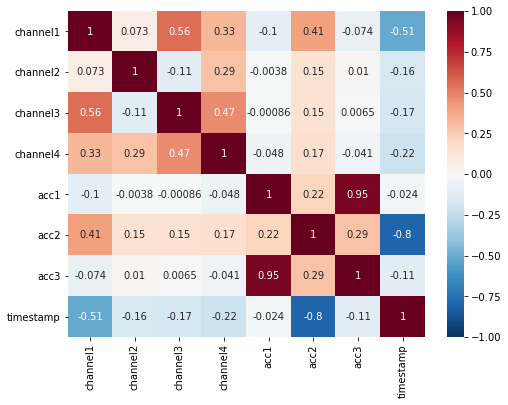

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap="RdBu_r")
plt.show()

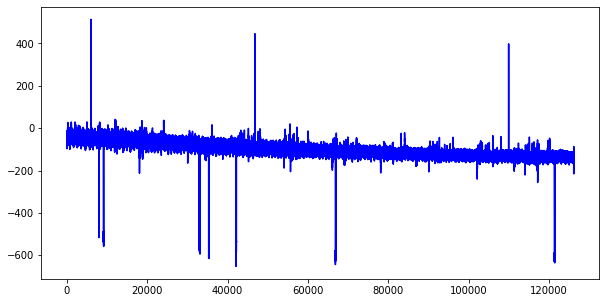

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df['channel1'], 'b')

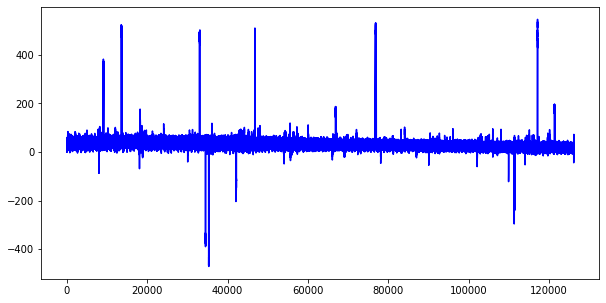

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df['channel2'], 'b')

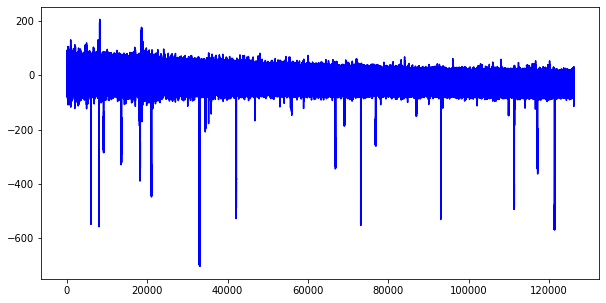

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df['channel3'], 'b')

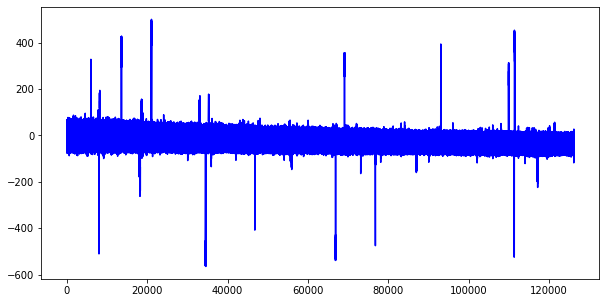

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df['channel4'], 'b')

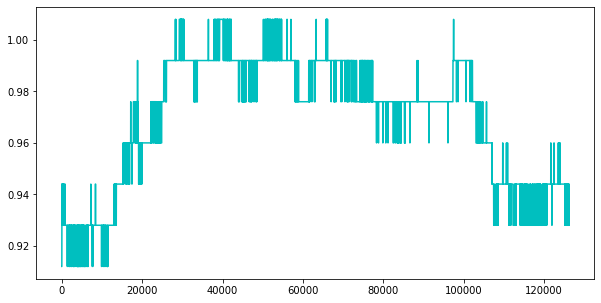

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df['acc1'], 'c')

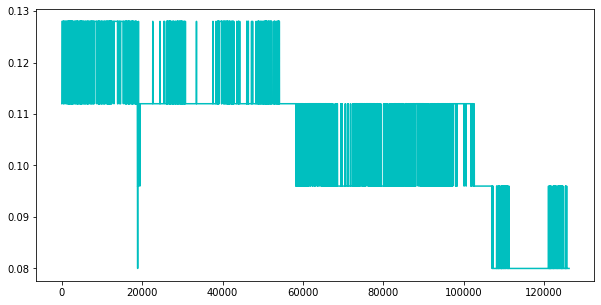

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df['acc2'], 'c')

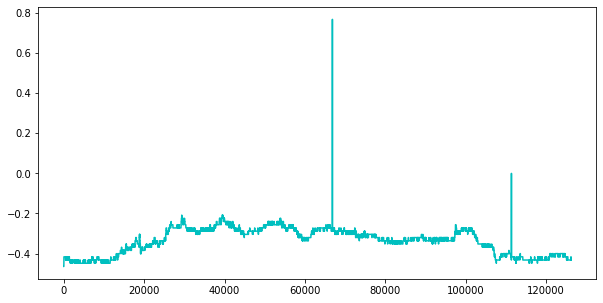

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df['acc3'], 'c')

In [ ]:
# Apply z-score.
zchan1 = (df['channel1']-np.mean(df['channel1']))/np.std(df['channel1'])
zchan2 = (df['channel2']-np.mean(df['channel2']))/np.std(df['channel2'])
zchan3 = (df['channel3']-np.mean(df['channel3']))/np.std(df['channel3'])
zchan4 = (df['channel4']-np.mean(df['channel4']))/np.std(df['channel4'])

In [ ]:
df['seconds_from_start'] = (df['timestamp']-df['timestamp'].iloc[0])/1000

In [ ]:
y_labels = np.zeros((df['time_std'].shape[0],1))

In [ ]:
# The first 30 seconds (from 12:52:31.069 to 12:53:00.000) were for calibration. 
# Thereafter, every 30 seconds consisted of eyes open/shut for a total of 5 of each condition.
y_labels[(60<df.seconds_from_start)&(df.seconds_from_start<90)] = 1
y_labels[(120<df.seconds_from_start)&(df.seconds_from_start<150)] = 1
y_labels[(180<df.seconds_from_start)&(df.seconds_from_start<210)] = 1
y_labels[(240<df.seconds_from_start)&(df.seconds_from_start<270)] = 1
y_labels[(300<df.seconds_from_start)&(df.seconds_from_start<330)] = 1
y_labels[(360<df.seconds_from_start)&(df.seconds_from_start<390)] = 1
y_labels[(420<df.seconds_from_start)&(df.seconds_from_start<450)] = 1
y_labels[(480<df.seconds_from_start)&(df.seconds_from_start<510)] = 1
y_labels[(540<df.seconds_from_start)&(df.seconds_from_start<570)] = 1
y_labels[(600<df.seconds_from_start)&(df.seconds_from_start<630)] = 1

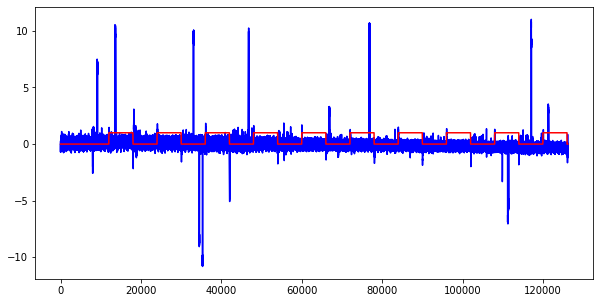

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(zchan2, 'b')
plt.plot(y_labels,'r')

In [ ]:
# Remove 60 Hz line noize.
fs = 200.0  # Sample frequency (Hz)
f0 = 60.0  # Frequency to be removed from signal (Hz)
Q = 30.0  # Quality factor
# Design notch filter
b, a = signal.iirnotch(f0, Q, fs)

zchan1 = signal.filtfilt(b, a, zchan1)
zchan2 = signal.filtfilt(b, a, zchan2)
zchan3 = signal.filtfilt(b, a, zchan3)
zchan4 = signal.filtfilt(b, a, zchan4)

zchan1[np.abs(zchan1)>3] = np.nan
zchan2[np.abs(zchan2)>3] = np.nan
zchan3[np.abs(zchan3)>3] = np.nan
zchan4[np.abs(zchan4)>3] = np.nan
y_labels[(np.abs(zchan1)>3) | (np.abs(zchan2)>3) | (np.abs(zchan3)>3) | (np.abs(zchan4)>3)] = np.nan

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater


In [ ]:
df['channel1'] = zchan1
df['channel2'] = zchan2
df['channel3'] = zchan3
df['channel4'] = zchan4
df['y_labels'] = y_labels

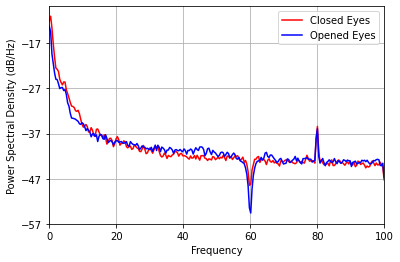

In [ ]:
X = df['channel2'].iloc[y_labels[:,0]==0] # Closed Eyes
plt.psd(X[~np.isnan(X)], 512, Fs=200, color='r', label='Closed Eyes')
X = df['channel2'].iloc[y_labels[:,0]==1] # Opened Eyes
plt.psd(X[~np.isnan(X)], 512, Fs=200, color='b', label='Opened Eyes')
plt.legend()
plt.xlim(0,100)
plt.show()